Netflix Content Analysis:

Goal: Understanding Netflix content distribution by analysing the dataset

🔍 Sub-Goals & Key Questions:
We can split your main goal into smaller, actionable questions:

📌 1. Content Type Distribution
What percentage of content is Movies vs TV Shows?

Has the ratio changed over the years?

📌 2. Temporal Analysis
How has Netflix's content library grown over time?

By release year of the content?

By date added to the platform?

📌 3. Country Distribution
Which countries produce the most Netflix content?

Is Netflix more focused on US/India/Korea content?

Has the geographical diversity changed over time?

📌 4. Genre Insights (from listed_in)
What are the most popular genres?

How do genres vary between Movies and TV Shows?

📌 5. Duration Trends
What is the typical length of a Movie or a TV Show?

Are newer movies longer or shorter?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#reading the dataset
df = pd.read_csv(r"C:\Users\AJain\OneDrive - Deslaurier Custom Cabinets\Desktop\Netflix-Content-Analysis\data\netflix_titles.csv")
#Displaying the first 3 rows of the dataset
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [6]:
#Looking at the shape of the dataset
df.shape

#Checking for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


MISSING DATA HANDLING

In [7]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [8]:
# Drop columns with nulls that are not needed for analysis
df. drop(columns=['cast', 'rating','director'], inplace=True)

In [9]:
# Fill missing values in the 'country' column with 'Unknown' as a placeholder
## This is useful for analysis where country information is required.

df['country'].fillna('Unknown', inplace=True)

C:\Users\AJain\AppData\Local\Temp\ipykernel_34992\2911344720.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


In [10]:
# Convert 'date_added' to datetime format and extract the year
## This allows for easier analysis of when content was added to Netflix.

df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')

df["year_added"] = df["date_added"].dt.year

📌 1. Content Type Distribution
What percentage of content is Movies vs TV Shows?

Has the ratio changed over the years?

<function matplotlib.pyplot.show(close=None, block=None)>

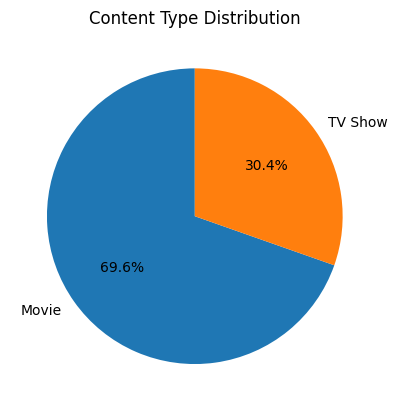

In [11]:
# Get the percentage of each type of content (movie or TV show)
type_percentages = df["type"].value_counts(normalize=True) * 100

# Plotting the distribution of content types
type_percentages.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', title='Content Type Distribution')
plt.show

<Axes: xlabel='year_added'>

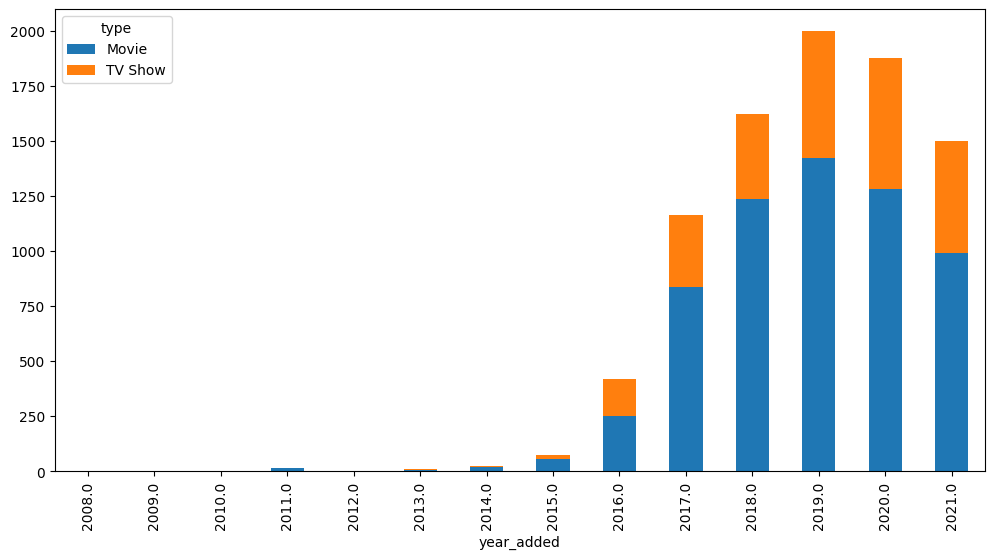

In [12]:

#Grouping the data by year and counting the number of each type of content added each year
content_trends = df.groupby('year_added')['type'].value_counts().unstack().fillna(0)

# Plotting the number of movies and TV shows added each year
content_trends.plot(kind='bar', stacked=True, figsize=(12, 6))


📌 2. Temporal Analysis
How has Netflix's content library grown over time?

By release year of the content?

By date added to the platform?

<Axes: title={'center': 'Growth of Content by Release Year'}, xlabel='release_year'>

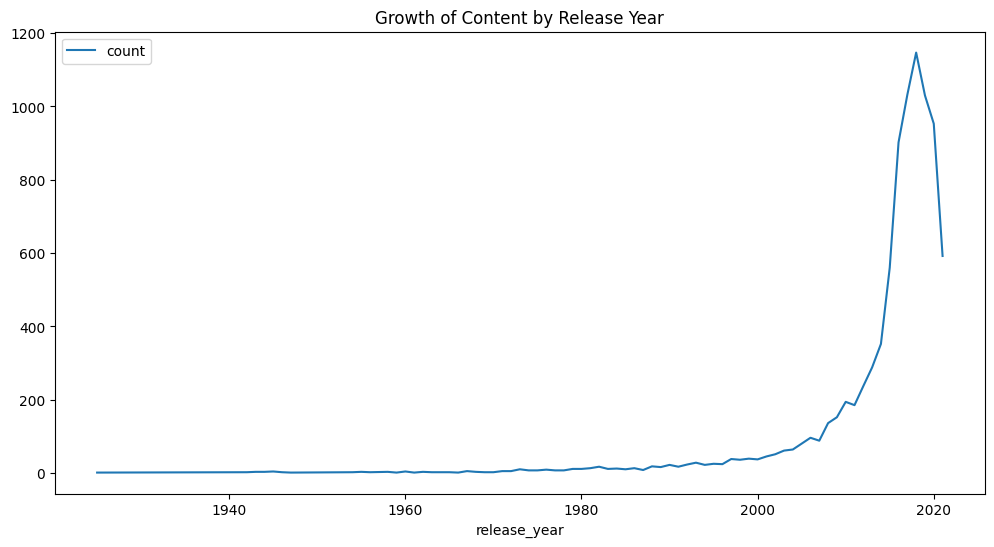

In [13]:
# Getting the number of content released by year
content_byrelease = df.groupby('release_year')['title'].value_counts().reset_index(name='count')

content_byrelease.drop(columns='title', inplace=True)

content_byrelease = content_byrelease.groupby('release_year').sum().reset_index()

# Plotting the growth of content by release year
content_byrelease.plot(x= 'release_year', y= 'count', kind='line', figsize=(12, 6), title='Growth of Content by Release Year')
 

In [14]:
df.head(15)

,show_id,type,title,country,date_added,release_year,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Unknown,2021-09-24,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,2021-09-24,2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
5,s6,TV Show,Midnight Mass,Unknown,2021-09-24,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0
6,s7,Movie,My Little Pony: A New Generation,Unknown,2021-09-24,2021,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
8,s9,TV Show,The Great British Baking Show,United Kingdom,2021-09-24,2021,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0
9,s10,Movie,The Starling,United States,2021-09-24,2021,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0
